In [19]:
import pandas as pd
import numpy as np
import joblib
import sys
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report, mean_squared_error
from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'FutureWarning')


In [20]:
# Read the CSV
survey = pd.read_csv('Data/survey.csv')
indicators = pd.read_csv('Data/raw_data/Development_Indicators.csv')

# Data Cleaning and Pre-Processing

In [21]:
# List of required 'Series Name' values
required_series = [
    "Coverage of social insurance programs (% of population)",
    "Coverage of social protection and labor programs (% of population)",
    "Coverage of unemployment benefits and ALMP (% of population)",
    "Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)",
    "Employment to population ratio, 15+, female (%) (national estimate)",
    "Employment to population ratio, 15+, male (%) (national estimate)",
    "GDP per capita (current US$)",
    "Labor force participation rate, female (% of female population ages 15+) (national estimate)",
    "Labor force participation rate, male (% of male population ages 15+) (national estimate)",
    "Labor force participation rate, total (% of total population ages 15+) (national estimate)",
    "Labor force with basic education (% of total working-age population with basic education)",
    "Labor force with basic education, female (% of female working-age population with basic education)",
    "Life expectancy at birth, female (years)",
    "Life expectancy at birth, total (years)",
    "Population, total",
    "Suicide mortality rate (per 100,000 population)",
    "Suicide mortality rate, female (per 100,000 female population)",
    "Suicide mortality rate, male (per 100,000 male population)",
    "Unemployment with basic education (% of total labor force with basic education)",
    "Unemployment with basic education, female (% of female labor force with basic education)",
    "Unemployment with basic education, male (% of male labor force with basic education)"
]

# Filter the dataset using the list of required 'Series Name' values
indicator_filter = indicators[indicators['Series Name'].isin(required_series)]

# Create a mapping for renaming the columns
column_rename_mapping = {f"{year} [YR{year}]": str(year) for year in range(1960, 2021)}

# Rename the columns
rename_df = indicator_filter.rename(columns=column_rename_mapping)

rename_df.head()


,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
8,Afghanistan,AFG,Coverage of social insurance programs (% of po...,per_si_allsi.cov_pop_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,Coverage of social protection and labor progra...,per_allsp.cov_pop_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,8.820582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Afghanistan,AFG,Coverage of unemployment benefits and ALMP (% ...,per_lm_alllm.cov_pop_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Afghanistan,AFG,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.481100,NaN,23.177000,NaN,NaN,18.201599,NaN,NaN,NaN
15,Afghanistan,AFG,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,75.998901,NaN,71.530197,NaN,NaN,65.576797,NaN,NaN,NaN


In [22]:
# Drop column we don't need 
dropeddata=rename_df.drop("Series Code",axis=1)
transposed = dropeddata.pivot_table(index=['Country Name','Country Code'], columns=['Series Name'], aggfunc='first', fill_value=0)
reset_1960=transposed["1960"].reset_index()
reset_1961=transposed["1961"].reset_index()
reset_1962=transposed["1962"].reset_index()
reset_1963=transposed["1963"].reset_index()
reset_1964=transposed["1964"].reset_index()
reset_1965=transposed["1965"].reset_index()
reset_1966=transposed["1966"].reset_index()
reset_1967=transposed["1967"].reset_index()
reset_1968=transposed["1968"].reset_index()
reset_1969=transposed["1969"].reset_index()
reset_1970=transposed["1970"].reset_index()
reset_1971=transposed["1971"].reset_index()
reset_1972=transposed["1972"].reset_index()
reset_1973=transposed["1973"].reset_index()
reset_1974=transposed["1974"].reset_index()
reset_1975=transposed["1975"].reset_index()
reset_1976=transposed["1976"].reset_index()
reset_1977=transposed["1977"].reset_index()
reset_1978=transposed["1978"].reset_index()
reset_1979=transposed["1979"].reset_index()
reset_1980=transposed["1980"].reset_index()
reset_1981=transposed["1981"].reset_index()
reset_1982=transposed["1982"].reset_index()
reset_1983=transposed["1983"].reset_index()
reset_1984=transposed["1984"].reset_index()
reset_1985=transposed["1985"].reset_index()
reset_1986=transposed["1986"].reset_index()
reset_1987=transposed["1987"].reset_index()
reset_1988=transposed["1988"].reset_index()
reset_1989=transposed["1989"].reset_index()
reset_1990=transposed["1990"].reset_index()
reset_1991=transposed["1991"].reset_index()
reset_1992=transposed["1992"].reset_index()
reset_1993=transposed["1993"].reset_index()
reset_1994=transposed["1994"].reset_index()
reset_1995=transposed["1995"].reset_index()
reset_1996=transposed["1996"].reset_index()
reset_1997=transposed["1997"].reset_index()
reset_1998=transposed["1998"].reset_index()
reset_1999=transposed["1999"].reset_index()
reset_2000=transposed["2000"].reset_index()
reset_2001=transposed["2001"].reset_index()
reset_2002=transposed["2002"].reset_index()
reset_2003=transposed["2003"].reset_index()
reset_2004=transposed["2004"].reset_index()
reset_2005=transposed["2005"].reset_index()
reset_2006=transposed["2006"].reset_index()
reset_2007=transposed["2007"].reset_index()
reset_2008=transposed["2008"].reset_index()
reset_2009=transposed["2009"].reset_index()
reset_2010=transposed["2010"].reset_index()
reset_2011=transposed["2011"].reset_index()
reset_2012=transposed["2012"].reset_index()
reset_2013=transposed["2013"].reset_index()
reset_2014=transposed["2014"].reset_index()
reset_2015=transposed["2015"].reset_index()
reset_2016=transposed["2016"].reset_index()
reset_2017=transposed["2017"].reset_index()
reset_2018=transposed["2018"].reset_index()
reset_2019=transposed["2019"].reset_index()
reset_2020=transposed["2020"].reset_index()
reset_1960['Year']=1960
reset_1961['Year']=1961
reset_1962['Year']=1962
reset_1963['Year']=1963
reset_1964['Year']=1964
reset_1965['Year']=1965
reset_1966['Year']=1966
reset_1967['Year']=1967
reset_1968['Year']=1968
reset_1969['Year']=1969
reset_1970['Year']=1970
reset_1971['Year']=1971
reset_1972['Year']=1972
reset_1973['Year']=1973
reset_1974['Year']=1974
reset_1975['Year']=1975
reset_1976['Year']=1976
reset_1977['Year']=1977
reset_1978['Year']=1978
reset_1979['Year']=1979
reset_1980['Year']=1980
reset_1981['Year']=1981
reset_1982['Year']=1982
reset_1983['Year']=1983
reset_1984['Year']=1984
reset_1985['Year']=1985
reset_1986['Year']=1986
reset_1987['Year']=1987
reset_1988['Year']=1988
reset_1989['Year']=1989
reset_1990['Year']=1990
reset_1991['Year']=1991
reset_1992['Year']=1992
reset_1993['Year']=1993
reset_1994['Year']=1994
reset_1995['Year']=1995
reset_1996['Year']=1996
reset_1997['Year']=1997
reset_1998['Year']=1998
reset_1999['Year']=1999
reset_2000['Year']=2000
reset_2001['Year']=2001
reset_2002['Year']=2002
reset_2003['Year']=2003
reset_2004['Year']=2004
reset_2005['Year']=2005
reset_2006['Year']=2006
reset_2007['Year']=2007
reset_2008['Year']=2008
reset_2009['Year']=2009
reset_2010['Year']=2010
reset_2011['Year']=2011
reset_2012['Year']=2012
reset_2013['Year']=2013
reset_2014['Year']=2014
reset_2015['Year']=2015
reset_2016['Year']=2016
reset_2017['Year']=2017
reset_2018['Year']=2018
reset_2019['Year']=2019
reset_2020['Year']=2020

all_year = [reset_1960,reset_1961,reset_1962,reset_1963,reset_1964,reset_1965,reset_1966,reset_1967,reset_1968,reset_1969,reset_1970,reset_1971,reset_1972,reset_1973,reset_1974,reset_1975,reset_1976,reset_1977,reset_1978,reset_1979,reset_1980,reset_1981,reset_1982,reset_1983,reset_1984,reset_1985,reset_1986,reset_1987,reset_1988,reset_1989,reset_1990,reset_1991,reset_1992,reset_1993,reset_1994,reset_1995,reset_1996,reset_1997,reset_1998,reset_1999,reset_2000,reset_2001,reset_2002,reset_2003,reset_2004,reset_2005,reset_2006,reset_2007,reset_2008,	reset_2009,reset_2010,	reset_2011,reset_2012,reset_2013,reset_2014,reset_2015,reset_2016,	reset_2017,reset_2018,reset_2019,reset_2020]

# Concatenate data
concate_data= pd.concat(all_year)

all_year_data =concate_data.replace(0, np.nan)


# Rename column
indicator_cleandata=all_year_data.rename(columns={"Coverage of social insurance programs (% of population)": "social_insurance",
                              "Series Name":"Series_name",
                              "Country Name":"Country",                  
                              "Country Code":"country_code",
                              "Coverage of social protection and labor programs (% of population)": "social_protection",
                              "Coverage of unemployment benefits and ALMP (% of population)":"unemployment_benefits",
                              "Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)": "Educational_attainment",
                              "Employment to population ratio, 15+, female (%) (national estimate)":"Female_employment",
                              "Employment to population ratio, 15+, male (%) (national estimate)": "Male_employment",
                              "GDP per capita (current US$)": "GDP_per_capita",
                              "Labor force participation rate, female (% of female population ages 15+) (national estimate)": "Labor_force_rate_female",
                              "Labor force participation rate, male (% of male population ages 15+) (national estimate)": "Labor_force_rate_male",
                              "Labor force participation rate, total (% of total population ages 15+) (national estimate)": "Labor_force_total",
                              "Labor force with basic education (% of total working-age population with basic education)":"Labour_force_with_basic_education",
                              "Labor force with basic education, female (% of female working-age population with basic education)":"Labour_force_with_basic_education_female",
                              "Life expectancy at birth, female (years)":"life_expectancy_female","Life expectancy at birth, male (years)": "Life_expectancy_male",
                              "Life expectancy at birth, total (years)":"Life_expectancy_total","Population, total":"Total_population",
                              "Suicide mortality rate (per 100,000 population)":"Suicide_mortality_rate_per_100k",
                              "Suicide mortality rate, female (per 100,000 female population)":"Suicide_mortality_rate_per_100k_female",
                              "Suicide mortality rate, male (per 100,000 male population)":"Suicide_mortality_rate_per_100k_male",
                              "Unemployment with basic education (% of total labor force with basic education)":"unemployment_with_basic_education_total",
                              "Unemployment with basic education, female (% of female labor force with basic education)":"Unemployment_with_basic_education_female",
                              "Unemployment with basic education, male (% of male labor force with basic education)":"Unemployment_with_basic_education_male"})
indicator_cleandata.to_csv('Data/clean_indicator.csv')
indicator_cleandata.head()

Series Name,Country,country_code,social_insurance,social_protection,unemployment_benefits,Female_employment,Male_employment,Labor_force_rate_female,Labor_force_rate_male,Labor_force_total,...,life_expectancy_female,Life_expectancy_total,Total_population,Suicide_mortality_rate_per_100k,Suicide_mortality_rate_per_100k_female,Suicide_mortality_rate_per_100k_male,unemployment_with_basic_education_total,Unemployment_with_basic_education_female,Unemployment_with_basic_education_male,Year
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.314,32.446,8996973.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,36.349998,53.070000,44.930000,...,63.247,62.283,1608800.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
2,Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.865,46.141,11057863.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,42.509998,68.239998,55.119999,...,NaN,NaN,20123.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13411.0,NaN,NaN,NaN,NaN,NaN,NaN,1960


In [23]:
# Get info about the data

indicator_cleandata.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 16043 entries, 0 to 262
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   16043 non-null  object 
 1   country_code                              16043 non-null  object 
 2   social_insurance                          372 non-null    float64
 3   social_protection                         404 non-null    float64
 4   unemployment_benefits                     201 non-null    float64
 5   Female_employment                         3713 non-null   float64
 6   Male_employment                           3709 non-null   float64
 7   Labor_force_rate_female                   4639 non-null   float64
 8   Labor_force_rate_male                     4640 non-null   float64
 9   Labor_force_total                         4905 non-null   float64
 10  Labour_force_with_basic_education        

Display items with correlation coefficient of 0.3 or more and -0.3 or less
Positive correlation


social_insurance                          0.515644
Suicide_mortality_rate_per_100k           1.000000
Suicide_mortality_rate_per_100k_female    0.781382
Suicide_mortality_rate_per_100k_male      0.976155
Name: Suicide_mortality_rate_per_100k, dtype: float64

Negative correlation


Labour_force_with_basic_education   -0.511196
Name: Suicide_mortality_rate_per_100k, dtype: float64

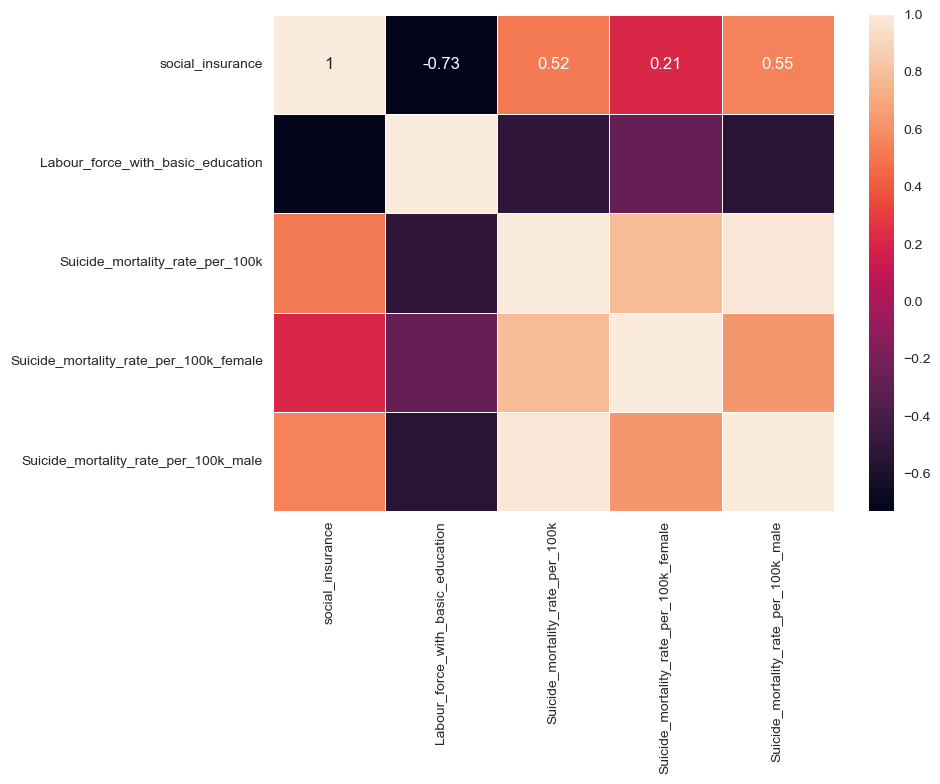

In [24]:
# Before we doing the ML we tried to see If there is any coorelation between factors on "Suicide_mortality_rate_per_100k" 
indicator_corr= pd.get_dummies(indicator_cleandata).corr()
indicator_corr_treatment= indicator_corr["Suicide_mortality_rate_per_100k"]

print("Display items with correlation coefficient of 0.3 or more and -0.3 or less")
# Get values with a correlation coefficient of 0.2 or more and -0.2 or less
target_cc_value = 0.4

print("Positive correlation")
display(indicator_corr_treatment[indicator_corr_treatment >= target_cc_value])
print("Negative correlation")
display(indicator_corr_treatment[indicator_corr_treatment <= (-1*target_cc_value)])

df_indexs = indicator_corr[(indicator_corr["Suicide_mortality_rate_per_100k"] >= target_cc_value) | (indicator_corr["Suicide_mortality_rate_per_100k"] <= (-1 * target_cc_value))].index

#print(indicator_corr)
df_cc_target=indicator_corr.loc[df_indexs,df_indexs]
plt.figure(figsize=(10, 8)) #heatmap size
sns.heatmap(df_cc_target, annot=True, linewidths=.5)
plt.savefig("static/images/corr.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

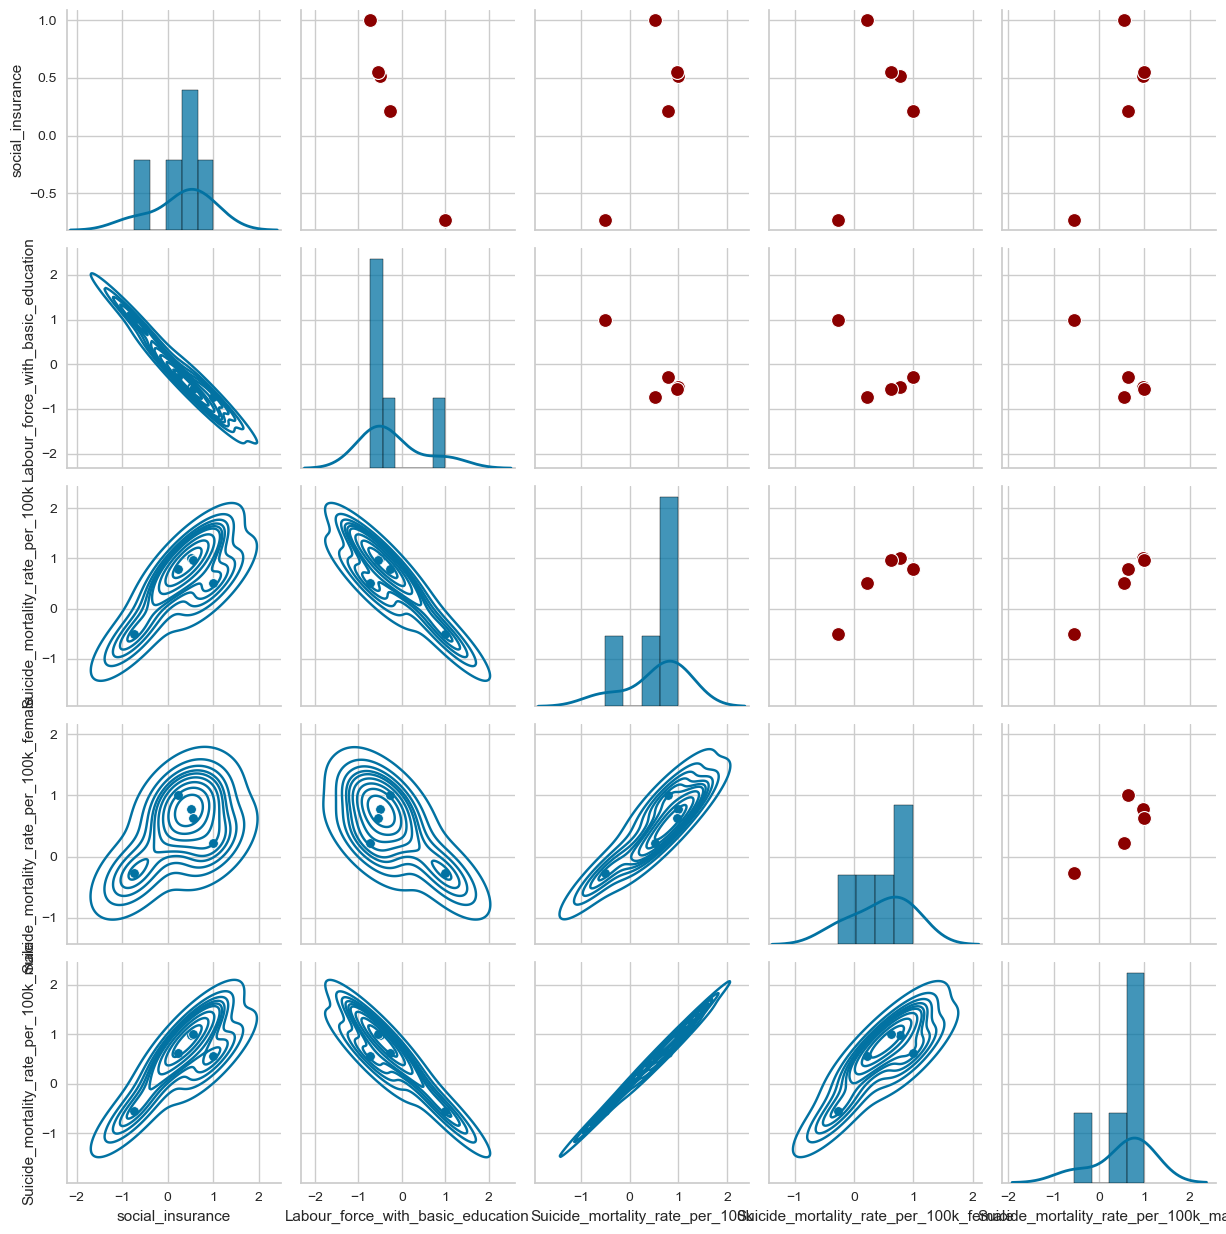

In [25]:
# scatter plot on the correlation matrix
g = sns.pairplot(df_cc_target)
g.map_upper(sns.scatterplot, s=100,color = 'darkred')
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.savefig("static/images/corrmatt.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

# 3. Machine Learning Analysis

In [26]:
# prepare the data
# Drop the "Year" column
ready_data = indicator_cleandata.drop("Year", axis=1)

# Group by 'Country' and calculate mean only for numeric columns
numeric_data = ready_data.select_dtypes(include=['number'])
df = numeric_data.groupby(ready_data['Country']).mean()

# Drop rows with missing values and reset index
clean = df.dropna().reset_index()

# Display the first few rows of the cleaned DataFrame
print(clean.head())


Series Name     Country  social_insurance  social_protection  \
0               Albania         41.096936          61.306452   
1             Argentina         29.696534          42.901479   
2               Armenia         52.777384          65.270131   
3            Bangladesh          1.365637          24.248428   
4                Belize         28.189539          39.387019   

Series Name  unemployment_benefits  Female_employment  Male_employment  \
0                        10.132416          40.581079        55.584757   
1                         0.951552          39.046175        64.342229   
2                         3.592037          39.940654        55.696192   
3                         4.320003          36.217546        88.275061   
4                         5.721098          37.650920        73.936151   

Series Name  Labor_force_rate_female  Labor_force_rate_male  \
0                          42.191883              58.822420   
1                          40.683966        

# 3A. Linear regression

In [27]:
#Select features (columns)
y = clean["Suicide_mortality_rate_per_100k"].values
data = clean.drop("Country",axis=1).drop("Suicide_mortality_rate_per_100k",axis=1).drop("Suicide_mortality_rate_per_100k_female",axis=1).drop("Suicide_mortality_rate_per_100k_male",axis=1).drop("Total_population",axis=1)
X=data.values
x_columns = data.iloc[:,1:].columns
x_columns


Index(['social_protection', 'unemployment_benefits', 'Female_employment',
       'Male_employment', 'Labor_force_rate_female', 'Labor_force_rate_male',
       'Labor_force_total', 'Labour_force_with_basic_education',
       'Labour_force_with_basic_education_female', 'life_expectancy_female',
       'Life_expectancy_total', 'unemployment_with_basic_education_total',
       'Unemployment_with_basic_education_female',
       'Unemployment_with_basic_education_male'],
      dtype='object', name='Series Name')

In [28]:
# Create a Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Train the Model (Linear regression)
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [29]:
print(model.coef_)

[[-0.05836925  0.08092829 -0.22247886  1.07433485 -0.48574548 -0.42148772
  -0.32681834  0.36360786  0.69079098 -1.01135106  3.56158427 -3.80398602
   0.67729602  0.17960162 -0.80668075]]


In [30]:
print(model.intercept_)

[24.73120899]


In [31]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7025286422232221
Testing Score: -0.35687998292414513


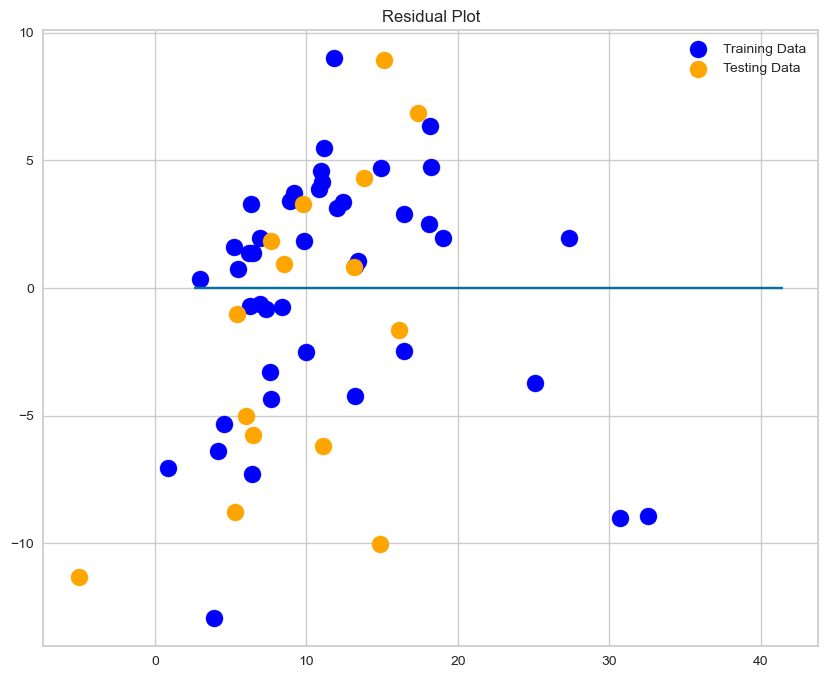

In [32]:
# create a polt on the training and test scores
plt.figure(figsize=(10, 8))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue",s=150, label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange",s=150, label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig("static/images/Linear_re.png", bbox_inches = "tight")

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)  # Fit the model on the training data

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

# Print the results
print(f"MSE: {MSE}, MAE: {MAE}")



MSE: 10.968223333333325, MAE: 2.4972000000000003


Feature: 0, Score: 0.00818
Feature: 1, Score: 0.02709
Feature: 2, Score: 0.00459
Feature: 3, Score: 0.00006
Feature: 4, Score: 0.04492
Feature: 5, Score: 0.00285
Feature: 6, Score: 0.01015
Feature: 7, Score: 0.00230
Feature: 8, Score: 0.46881
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.07282
Feature: 11, Score: 0.27608
Feature: 12, Score: 0.03907
Feature: 13, Score: 0.00046
Feature: 14, Score: 0.04262


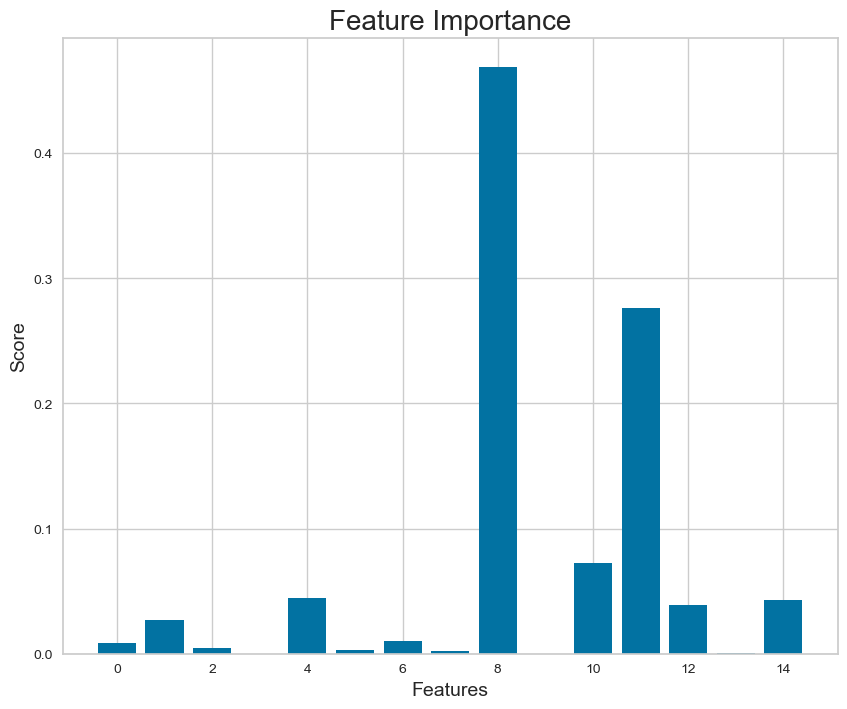

In [43]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Get feature importance from the trained RandomForestRegressor
importance = model.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v:.5f}')

# Plot feature importance
plt.figure(figsize=(10, 8))
pyplot.bar([x for x in range(len(importance))], importance)

# Plot the data
plt.xlabel("Features", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Feature Importance", fontsize=20)

# Save the plot
plt.savefig("static/images/RandomForest_re_importance.png", bbox_inches="tight")

# Show the plot
pyplot.show()


In [44]:
# Save the Model
filename = 'model_sav/linear_Regression.sav'
joblib.dump(model, filename)

['model_sav/linear_Regression.sav']

# 3B. Decision Tree Regression

In [45]:
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
model=DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [46]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: -0.603406280961938


In [47]:
y_pred=model.predict(X_test)

In [48]:
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
MAE=metrics.mean_absolute_error(y_test, predictions)
print(f"MSE: {MSE}, R2: {r2}, MAE: {MAE}")

MSE: 44.777946666666686, R2: -0.603406280961938, MAE: 4.849333333333334


In [49]:
# Save the Model
filename = 'model_sav/Dec_Regression.sav'
joblib.dump(model, filename)

['model_sav/Dec_Regression.sav']

# 3C. Support Vector Regression (SVR)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [51]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [52]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.1805469504112408
Testing Score: 0.1344313952315529


In [53]:
y_pred=regressor.predict(X_test)

In [54]:
predictions = regressor.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = regressor.score(X_test, y_test)
MAE=metrics.mean_absolute_error(y_test, predictions)
print(f"MSE: {MSE}, R2: {r2}, MAE: {MAE}")

MSE: 90.97312614237852, R2: 0.1344313952315529, MAE: 6.234672625721537


In [55]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.853


In [56]:
# Save the Model
filename = 'model_sav/SVR_Regression.sav'
joblib.dump(regressor, filename)

['model_sav/SVR_Regression.sav']

# 3D. Logistic Regression

For our logistic regression model we group our dependent variable ("Suicide_mortality_rate_per_100k") in two group below and above the mean the mean value( 11.5) of Suicide mortality rate per 100,000 at the national level. Suicide mortality rate above 11.5 would be high and below 11.5 would be low.

In [57]:
data = clean.drop("Country",axis=1).drop("Suicide_mortality_rate_per_100k",axis=1).drop("Suicide_mortality_rate_per_100k_female",axis=1).drop("Suicide_mortality_rate_per_100k_male",axis=1).drop("Total_population",axis=1)
X=data.values
x_columns = data.iloc[:,1:].columns
x_columns
y = clean["Suicide_mortality_rate_per_100k"]
def score(i):
    if i < 11.5: return "Low"
    if i > 11.5: return "High"
li = map(lambda x: "{1}".format(x, score(x)), y)
y2=[]
for i in li:
    y2.append(i)

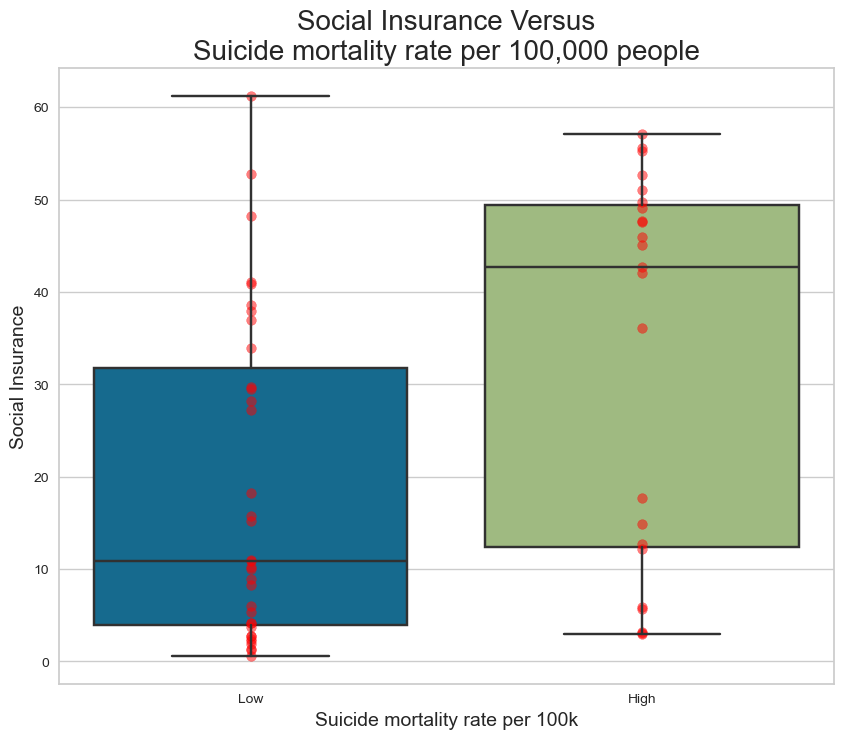

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# Use keyword arguments for sns.boxplot
sns.boxplot(x=y2, y=clean['social_insurance'])

# Add scatter plot
plt.scatter(y2, clean['social_insurance'], color='red', alpha=0.5)

# Label the axes
plt.xlabel("Suicide mortality rate per 100k", fontsize=14)
plt.ylabel("Social Insurance", fontsize=14)

# Add a title
plt.title("Social Insurance Versus\nSuicide mortality rate per 100,000 people", fontsize=20)

# Save the figure
plt.savefig("static/images/Social_Insurance.png", bbox_inches="tight")

# Show the plot
plt.show()


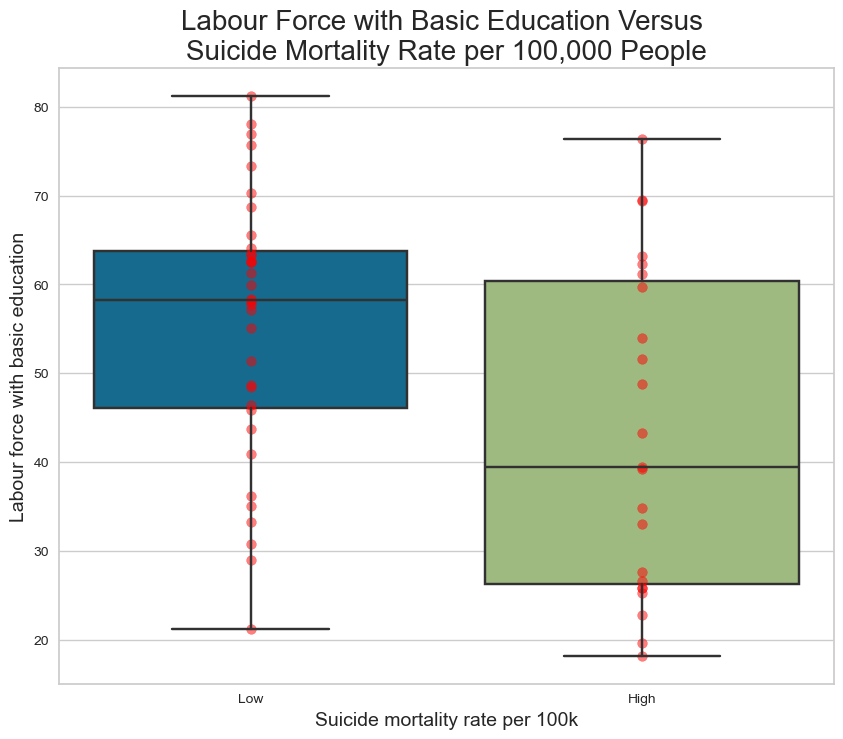

In [59]:
plt.figure(figsize=(10, 8))

# Use keyword arguments for sns.boxplot
sns.boxplot(x=y2, y=clean['Labour_force_with_basic_education'])

# Add scatter plot
plt.scatter(y2, clean['Labour_force_with_basic_education'], color='red', alpha=0.5)

# Label the axes
plt.xlabel("Suicide mortality rate per 100k", fontsize=14)
plt.ylabel("Labour force with basic education", fontsize=14)

# Add a title
plt.title("Labour Force with Basic Education Versus \nSuicide Mortality Rate per 100,000 People", fontsize=20)

# Save the figure
plt.savefig("static/images/Labour_force_with_basic_education.png", bbox_inches="tight")

# Show the plot
plt.show()

In [60]:
norm=pd.get_dummies(y2, drop_first = False)
norm_y=norm["High"]
norm_y=pd.DataFrame(norm_y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

In [62]:
model = LogisticRegression()

In [63]:
model.fit(X_train, y_train)

LogisticRegression()

In [64]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.8
Testing Data Score: 0.4444444444444444


In [65]:
predictions = model.predict(X_test)

In [66]:
### Accuracy
accuracy = accuracy_score(y_test, predictions)
### Recall
recall = recall_score(y_test, predictions)
### Precision
precision = precision_score(y_test, predictions)
### F1
f1 = f1_score(y_test, predictions)

print('Accuracy：{0:.2f}%'.format(accuracy * 100))
print('Recall：{0:.2f}%'.format(recall * 100))
print('Precision：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

Accuracy：44.44%
Recall：14.29%
Precision：20.00%
F1：16.67%


In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.54      0.64      0.58        11
        True       0.20      0.14      0.17         7

    accuracy                           0.44        18
   macro avg       0.37      0.39      0.38        18
weighted avg       0.41      0.44      0.42        18



<Axes: title={'center': 'LogisticRegression Classification Report'}>

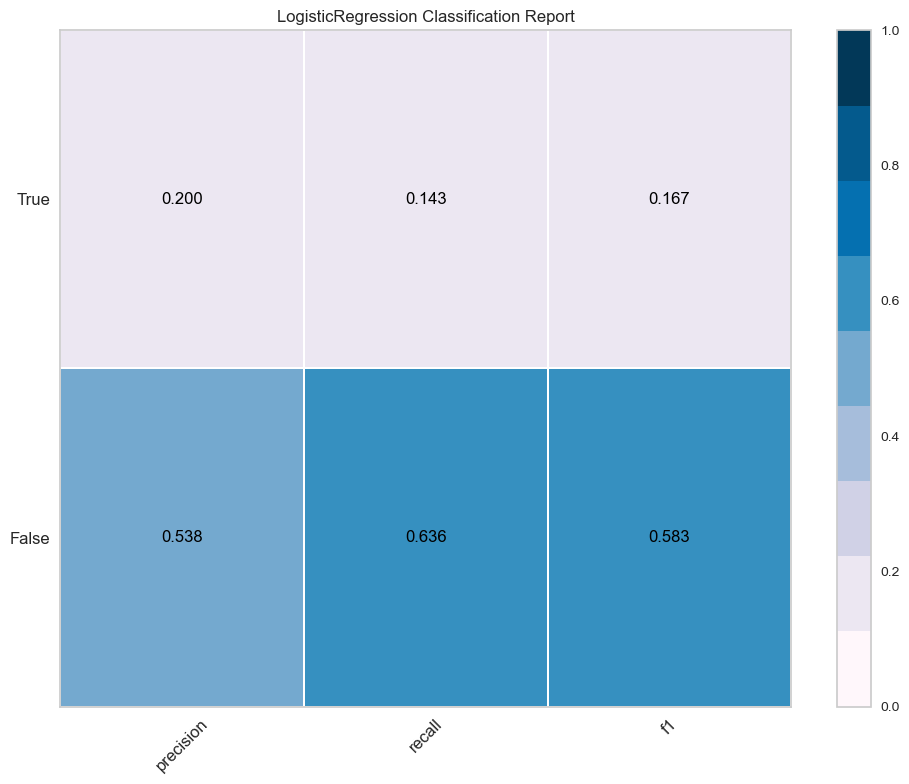

In [68]:
plt.figure(figsize=(10,8))
viz = ClassificationReport(LogisticRegression(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
viz.show(outpath="static/images/logistic_befor_classifier.png")

Feature: 0, Score: -0.02391
Feature: 1, Score: 0.08452
Feature: 2, Score: -0.05187
Feature: 3, Score: 0.50661
Feature: 4, Score: -0.31818
Feature: 5, Score: -0.19441
Feature: 6, Score: 0.13713
Feature: 7, Score: 0.03136
Feature: 8, Score: 0.25551
Feature: 9, Score: -0.35431
Feature: 10, Score: 0.09685
Feature: 11, Score: -0.24438
Feature: 12, Score: 0.21486
Feature: 13, Score: 0.08477
Feature: 14, Score: -0.18056


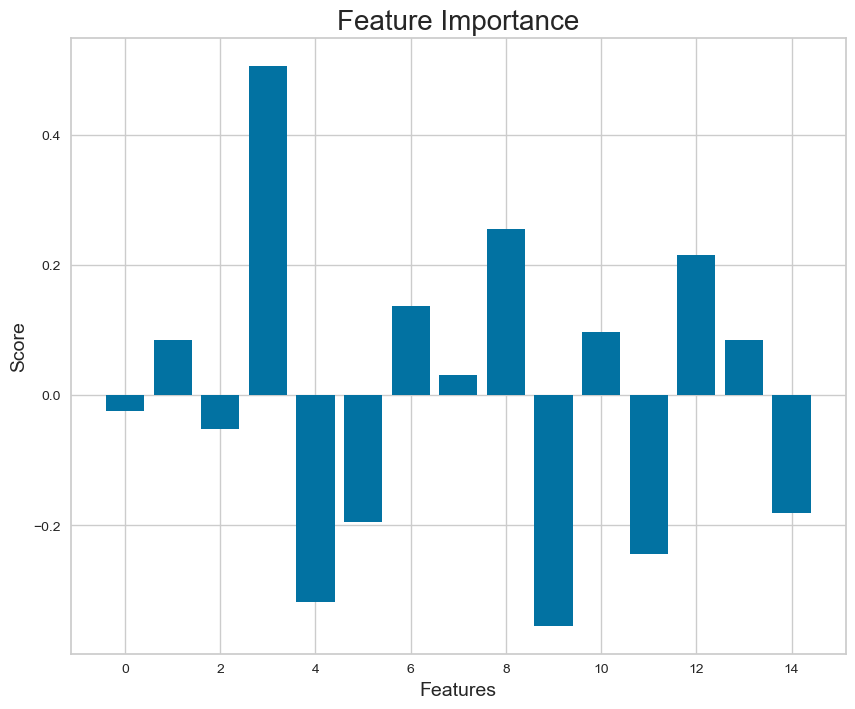

In [69]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10, 8))
pyplot.bar([x for x in range(len(importance))], importance)
plt.savefig("static/images/logistic_importance.png", bbox_inches = "tight")
plt.xlabel("Features",fontsize = 14)
plt.ylabel("Score",fontsize = 14)
plt.title("Feature Importance",fontsize = 20)
pyplot.show()

In [70]:
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [71]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.875 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.625 total time=   0.0s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.375 total time=   0.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.250 total time=   0.0s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.750 total time=   0.0s
[CV 1/5] END .....................C=5, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=5, penalty=l1

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [72]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l2'}
0.575


In [73]:
# Training score:
grid.score(X_train, y_train)

0.8

In [74]:
# Testing score:
grid.score(X_test, y_test)

0.4444444444444444

<Axes: title={'center': 'LogisticRegression Classification Report'}>

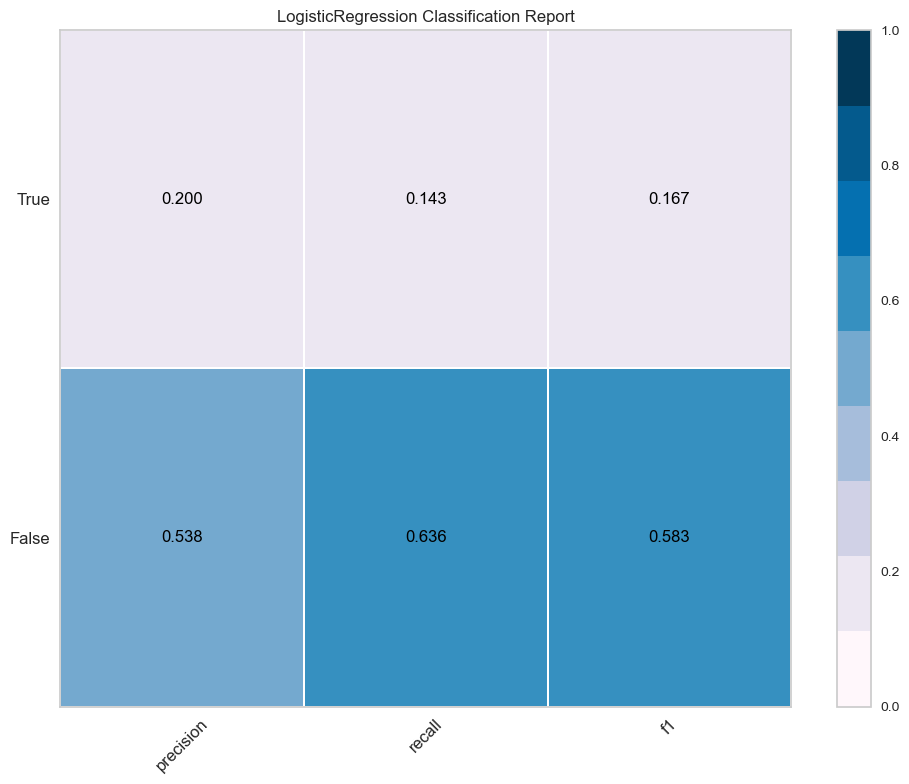

In [75]:
plt.figure(figsize=(10, 8))
viz = ClassificationReport(LogisticRegression(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
viz.show(outpath="static/images/logisticregression_classifier.png")

In [76]:
# Save the Model
filename = 'model_sav/logistic_Regression.sav'
joblib.dump(model, filename)

['model_sav/logistic_Regression.sav']

# 3E. Support Vector Machine 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)



In [78]:
X_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

In [79]:
model = SVC(kernel='linear')
model.fit(X_train_minmax, y_train)

SVC(kernel='linear')

In [80]:
print(f"Training Data Score: {model.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {model.score(X_test_minmax, y_test)}")

Training Data Score: 0.775
Testing Data Score: 0.7222222222222222


In [81]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [82]:
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.875 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.625 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.375 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.750 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.0005;, score=0.875 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.0005;, score=0.625 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.0005;, score=0.375 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.0005;, score=0.875 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.0005;, score=0.750 total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.875 total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.001;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [83]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.7


In [84]:
# Training score:
grid.score(X_train_minmax, y_train)

0.775

In [85]:
# Testing score:
grid.score(X_test_minmax, y_test)

0.7222222222222222

In [86]:
predictions = model.predict(X_test_minmax)

In [87]:
### Accuracy
accuracy = accuracy_score(y_test, predictions)
### Recall
recall = recall_score(y_test, predictions)
### Precision
precision = precision_score(y_test, predictions)
### F1
f1 = f1_score(y_test, predictions)

print('Accuracy：{0:.2f}%'.format(accuracy * 100))
print('Recall：{0:.2f}%'.format(recall * 100))
print('Precision：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

Accuracy：72.22%
Recall：71.43%
Precision：62.50%
F1：66.67%


In [88]:
# Print Classification Report.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.80      0.73      0.76        11
        True       0.62      0.71      0.67         7

    accuracy                           0.72        18
   macro avg       0.71      0.72      0.71        18
weighted avg       0.73      0.72      0.72        18



<Axes: title={'center': 'SVC Classification Report'}>

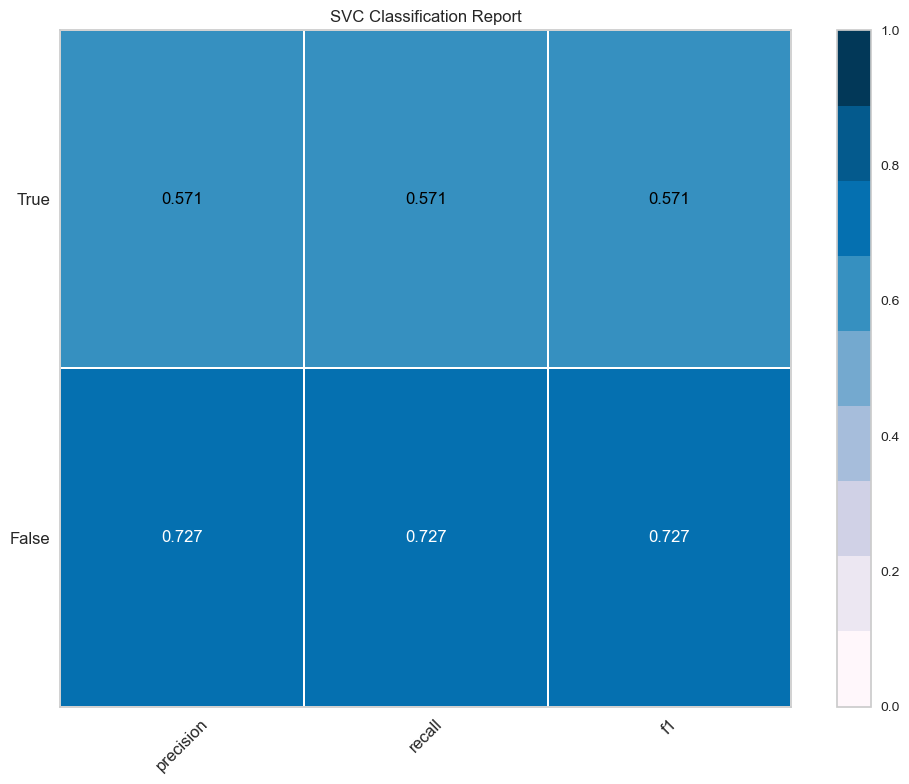

In [89]:
plt.figure(figsize=(10, 8))
viz = ClassificationReport(SVC(),cmap="PuBu")
viz.fit(X_train_minmax, y_train)
viz.score(X_test_minmax, y_test)
viz.finalize()
viz.show(outpath="static/images/svm_classifier.png")

<Axes: title={'center': 'Feature Importances of 15 Features using SVC'}, xlabel='relative coefficient magnitude'>

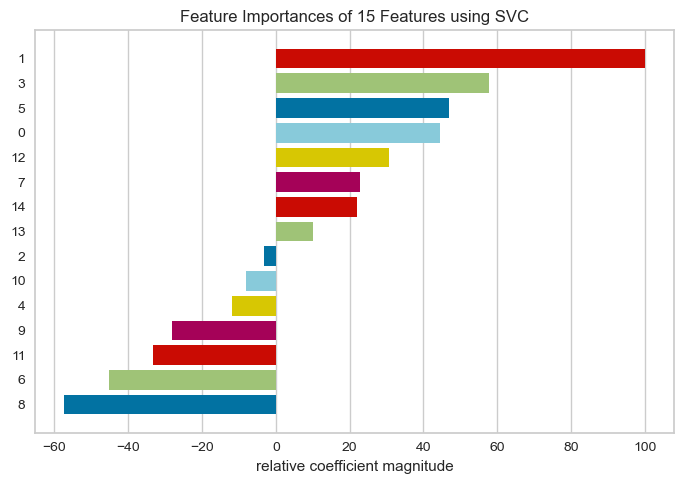

In [90]:
plt.figure(figsize=(10, 8))
viz = FeatureImportances(model,size=(700, 500),color='b', align='center')
viz.fit(X_train_minmax, y_train)
viz.show(outpath="static/images/svm_featureimportance.png")

In [91]:
# Save the Model
filename = 'model_sav/logistic_Regression.sav'
joblib.dump(model, filename)

['model_sav/logistic_Regression.sav']

# 3F. Decision tree

In [92]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=1234)
clf = clf.fit(X_train, y_train)
print("train score=", clf.score(X_train, y_train))
print("test score=", clf.score(X_test, y_test))

train score= 0.975
test score= 0.6111111111111112


Feature: 0, Score: 0.67437
Feature: 1, Score: 1.52001
Feature: 2, Score: -0.04673
Feature: 3, Score: 0.87626
Feature: 4, Score: -0.18037
Feature: 5, Score: 0.71325
Feature: 6, Score: -0.68802
Feature: 7, Score: 0.34621
Feature: 8, Score: -0.87089
Feature: 9, Score: -0.42585
Feature: 10, Score: -0.12280
Feature: 11, Score: -0.50481
Feature: 12, Score: 0.46501
Feature: 13, Score: 0.15293
Feature: 14, Score: 0.33613


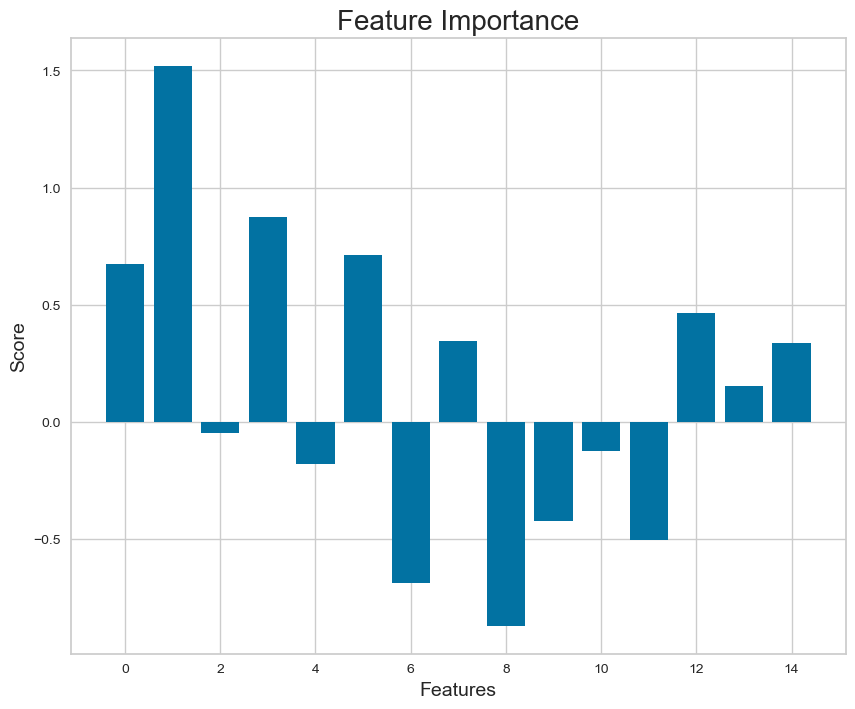

In [93]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10, 8))
pyplot.bar([x for x in range(len(importance))], importance)
plt.savefig("static/images/decision_tree_importance.png", bbox_inches = "tight")
plt.xlabel("Features",fontsize = 14)
plt.ylabel("Score",fontsize = 14)
plt.title("Feature Importance",fontsize = 20)
pyplot.show()

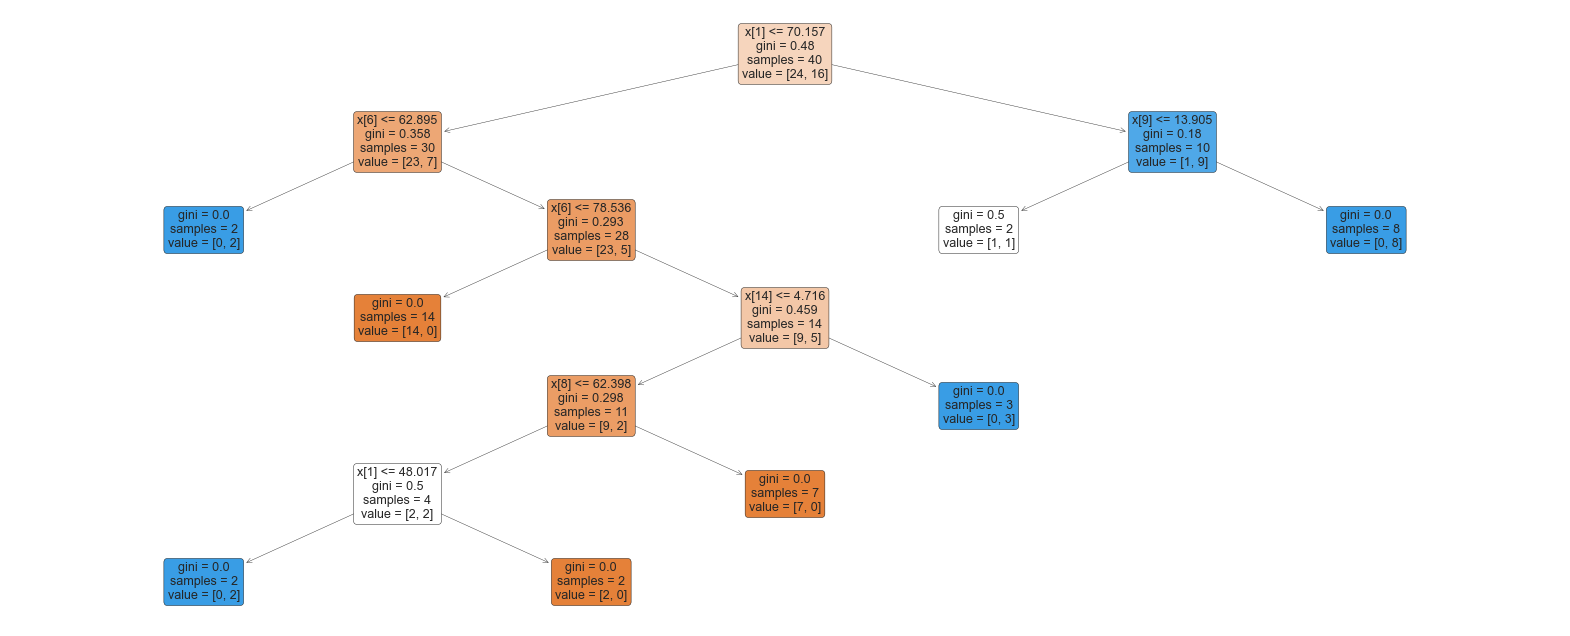

In [94]:
plt.figure(figsize=(20, 8))
tree.plot_tree(clf,
               filled=True, 
               rounded=True,
               fontsize=9) 
plt.savefig("static/images/tree.png", bbox_inches = "tight")

In [95]:
# Save the Model
filename = 'model_sav/DecisionTree.sav'
joblib.dump(clf, filename)

['model_sav/DecisionTree.sav']

 # 3G. Random Forest

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, norm_y, random_state=42, test_size = 0.3)

In [97]:
X_scaler = MinMaxScaler().fit(X_train)

X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [98]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
print(f"Training Data Score: {randomforest.score(X_train, y_train)}")
print(f"Testing Data Score: {randomforest.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.6666666666666666


In [100]:
sorted(zip(randomforest.feature_importances_, x_columns), reverse=True)

[(0.13144822024868305, 'unemployment_benefits'),
 (0.08423282056122411, 'Life_expectancy_total'),
 (0.07908230087324403, 'Labor_force_total'),
 (0.07501579860833553, 'Labour_force_with_basic_education_female'),
 (0.07402701404303527, 'Labor_force_rate_male'),
 (0.07258514489601614, 'social_protection'),
 (0.06617421067614715, 'life_expectancy_female'),
 (0.06180964571909474, 'Male_employment'),
 (0.05926465620338933, 'Unemployment_with_basic_education_female'),
 (0.05746254761432861, 'Labor_force_rate_female'),
 (0.0544588688900082, 'Unemployment_with_basic_education_male'),
 (0.038994457490315014, 'unemployment_with_basic_education_total'),
 (0.03262810475030267, 'Female_employment'),
 (0.032185227327112015, 'Labour_force_with_basic_education')]

In [101]:
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(randomforest, param_grid, verbose=3)

In [102]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...max_depth=125, n_estimators=250;, score=0.750 total time=   0.2s
[CV 2/5] END ...max_depth=125, n_estimators=250;, score=0.625 total time=   0.1s
[CV 3/5] END ...max_depth=125, n_estimators=250;, score=0.375 total time=   0.1s
[CV 4/5] END ...max_depth=125, n_estimators=250;, score=0.625 total time=   0.1s
[CV 5/5] END ...max_depth=125, n_estimators=250;, score=0.750 total time=   0.1s
[CV 1/5] END ...max_depth=125, n_estimators=300;, score=0.625 total time=   0.2s
[CV 2/5] END ...max_depth=125, n_estimators=300;, score=0.625 total time=   0.2s
[CV 3/5] END ...max_depth=125, n_estimators=300;, score=0.375 total time=   0.2s
[CV 4/5] END ...max_depth=125, n_estimators=300;, score=0.500 total time=   0.2s
[CV 5/5] END ...max_depth=125, n_estimators=300;, score=0.625 total time=   0.2s
[CV 1/5] END ...max_depth=125, n_estimators=350;, score=0.625 total time=   0.2s
[CV 2/5] END ...max_depth=125, n_estimators=350;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [125, 150, 175],
                         'n_estimators': [250, 300, 350]},
             verbose=3)

In [103]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test)

In [104]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.67      0.73      0.70        11
        True       0.50      0.43      0.46         7

    accuracy                           0.61        18
   macro avg       0.58      0.58      0.58        18
weighted avg       0.60      0.61      0.60        18



<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

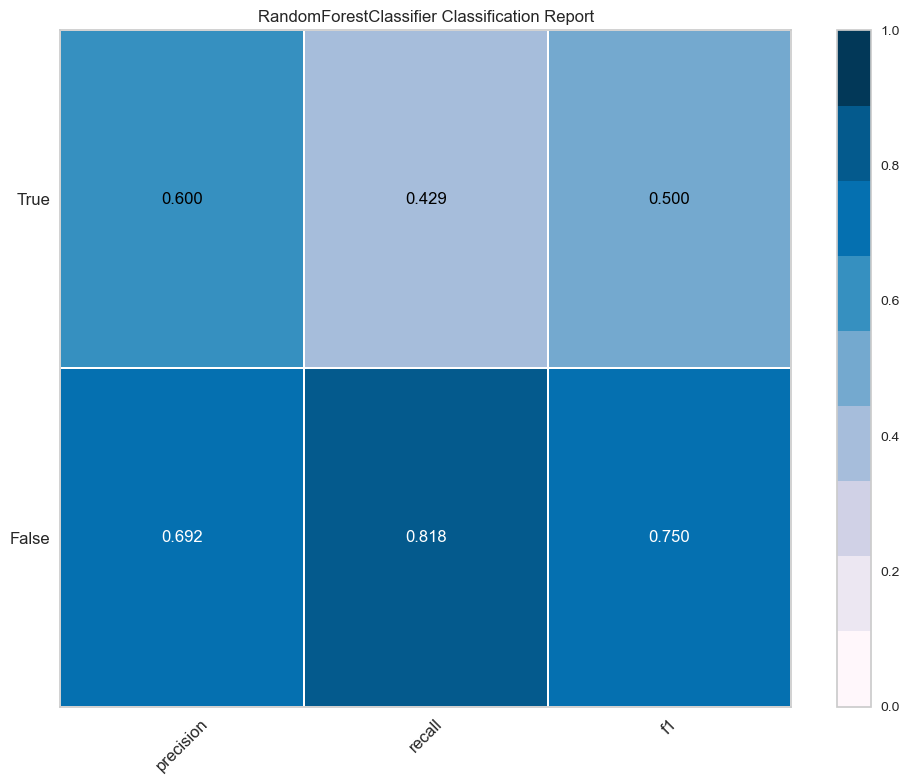

In [105]:
plt.figure(figsize=(10, 8))
viz = ClassificationReport(RandomForestClassifier(),cmap="PuBu")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()
viz.show(outpath="static/images/randomforest_classifier.png")

<Axes: title={'center': 'Feature Importances of 15 Features using RandomForestClassifier'}, xlabel='relative importance'>

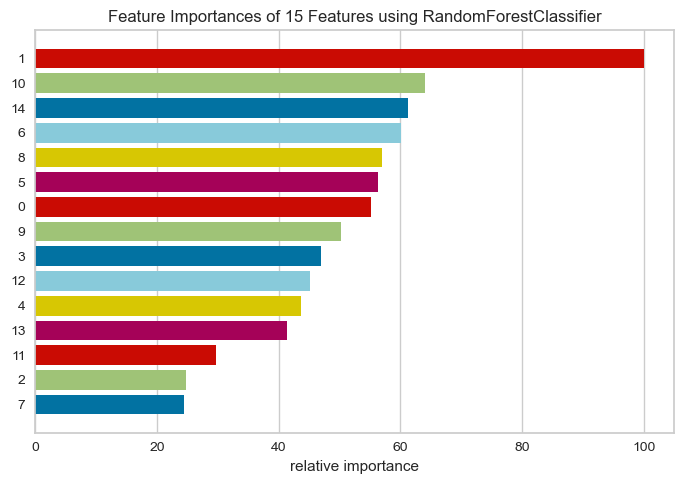

In [106]:
plt.figure(figsize=(10, 8))
viz = FeatureImportances(randomforest,size=(700, 500),color='b', align='center')
viz.fit(X_train, y_train)
viz.show(outpath="static/images/rf_featureimportance.png")

In [107]:
# Save the Model
filename = 'model_sav/randomforest.sav'
joblib.dump(randomforest, filename)

['model_sav/randomforest.sav']

RF: 0.7100 (0.1795)
LR: 0.6900 (0.1633)
DeT: 0.5533 (0.1869)
SVM: 0.7100 (0.1795)


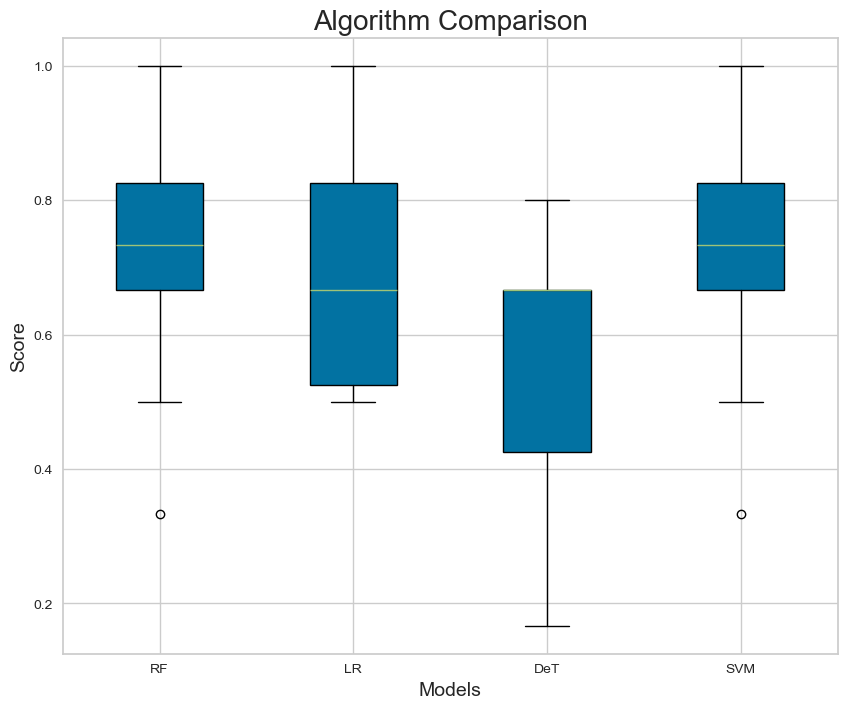

In [109]:

from sklearn import model_selection

seed = 7

# Prepare models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DeT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    # Ensure shuffle=True for random_state to work
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
    print(msg)

# Boxplot algorithm comparison
plt.figure(figsize=(10, 8))
plt.boxplot(results, patch_artist=True)
plt.title('Algorithm Comparison', fontsize=20)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(ticks=range(1, len(names) + 1), labels=names)
plt.savefig("static/images/compare.png", bbox_inches="tight")
plt.show()


# 4. Conclusion

In this project we used various machine learning models, trained and tested the data to see the models ability to predict suicide mortality rate from various macro socio-economic factors in the national level. We used linear regression, logistic regression, support vector machine, decision tree, and random forest model. We note differences in accuracy (and thus, effectiveness), the models has toward the entire dataset. We noticed similar reapearing patterns that we knew would serve of importance when predicting suicide mortality rate from various macro socio-economic factors.

The first step in our analysis was to clean, and preprocess our dataset to make ready for machine learning analysis. We cleaned, explored and visualized the data. The pre-processing normalize the data for ML analysis.

Before the ML analysis we tried to see If there is any coorelation between factors on Suicide mortality rate per 100,000 people. We have found a positive(0.5) correlation between Suicide mortality rate, and coverage of social insurance programs.

Previous research identified that there is a solid association between economic strain and suicide, little attention has been paid to how specific welfare policies that are designed to alleviate economic strain may influence suicide rates. There is a growing body of research that is using an institutional approach to demonstrate the role of welfare-state policies in the distribution of health. However, this perspective has not been applied yet to the investigation of suicide.(Simone Rambotti 2019) 

We have also found a negative(-0.5) correlation between suicide mortality rate (% of population) and coverage of labor force with basic education (% of total working-age population with basic education). When Countries having a population at least with a basic education is higher it negatively relate with Suicide mortality rate. Which means when the poulation obtained at least basic education increases suicide mortality rate decreases.


The first three models we executed are linear regression, decision tree regression, and support vector regression (SVR) to estimate the suicide mortality rate (continous dependent variable) on the estimator variables. The result from this three models showed that lower R-Squared value(R2), and higher mean square error(MSE). However, comparing the above three models decision tree regression explained the dependent variable(suicide mortality rate) better by the independent variable(predictor variables) with R-Squared value 0.24 and mean square error (MSE) 87.11.

To test the other models we grouped our continous dependent variable ("Suicide_mortality_rate_per_100k") in to two groups, below and above the mean value( 11.5). Suicide mortality rate above 11.5 would be high and below 11.5 would be low. Afterward we executed logistic regression, support Vector Machine, decision tree, and random forest model. The finding from this models showed that the models accuracy to peredict the dependent variable is low but, compering the models support vector machine explain the data very well after grid search with 72.2 accuracy.

In conclusion, mental helath and suicide is an important cause to study because we are losing so many lifes in the world because of suicide. Our project focused identifying macro level socio-economic factors that would cause the problem, and we belive that if socio-economic factors, and countries polices towards mental health changed the issue will be solved with some point. However, the issue is too complex, and it depends on the indviduals subjective expiriance, so a collaborative, and a comprehensive approach is important to address the issue. Specific to this project we have been challenged with the data quality (so many null values), we hope if the models applied with a better data we can see more tangible factors that would predict the problem.